In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wines=pd.read_csv("WineQT.csv")
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wines.shape

(1143, 13)

In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
len(wines["Id"].unique())

1143

In [6]:
wines.drop(["Id"],axis=1,inplace=True)

In [7]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
x=wines.drop(["quality"],axis=1)
y=wines["quality"]

In [9]:
x.shape,y.shape

((1143, 11), (1143,))

In [10]:
# sns.pairplot(x)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [12]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(800, 11) (343, 11)
(800,) (343,)


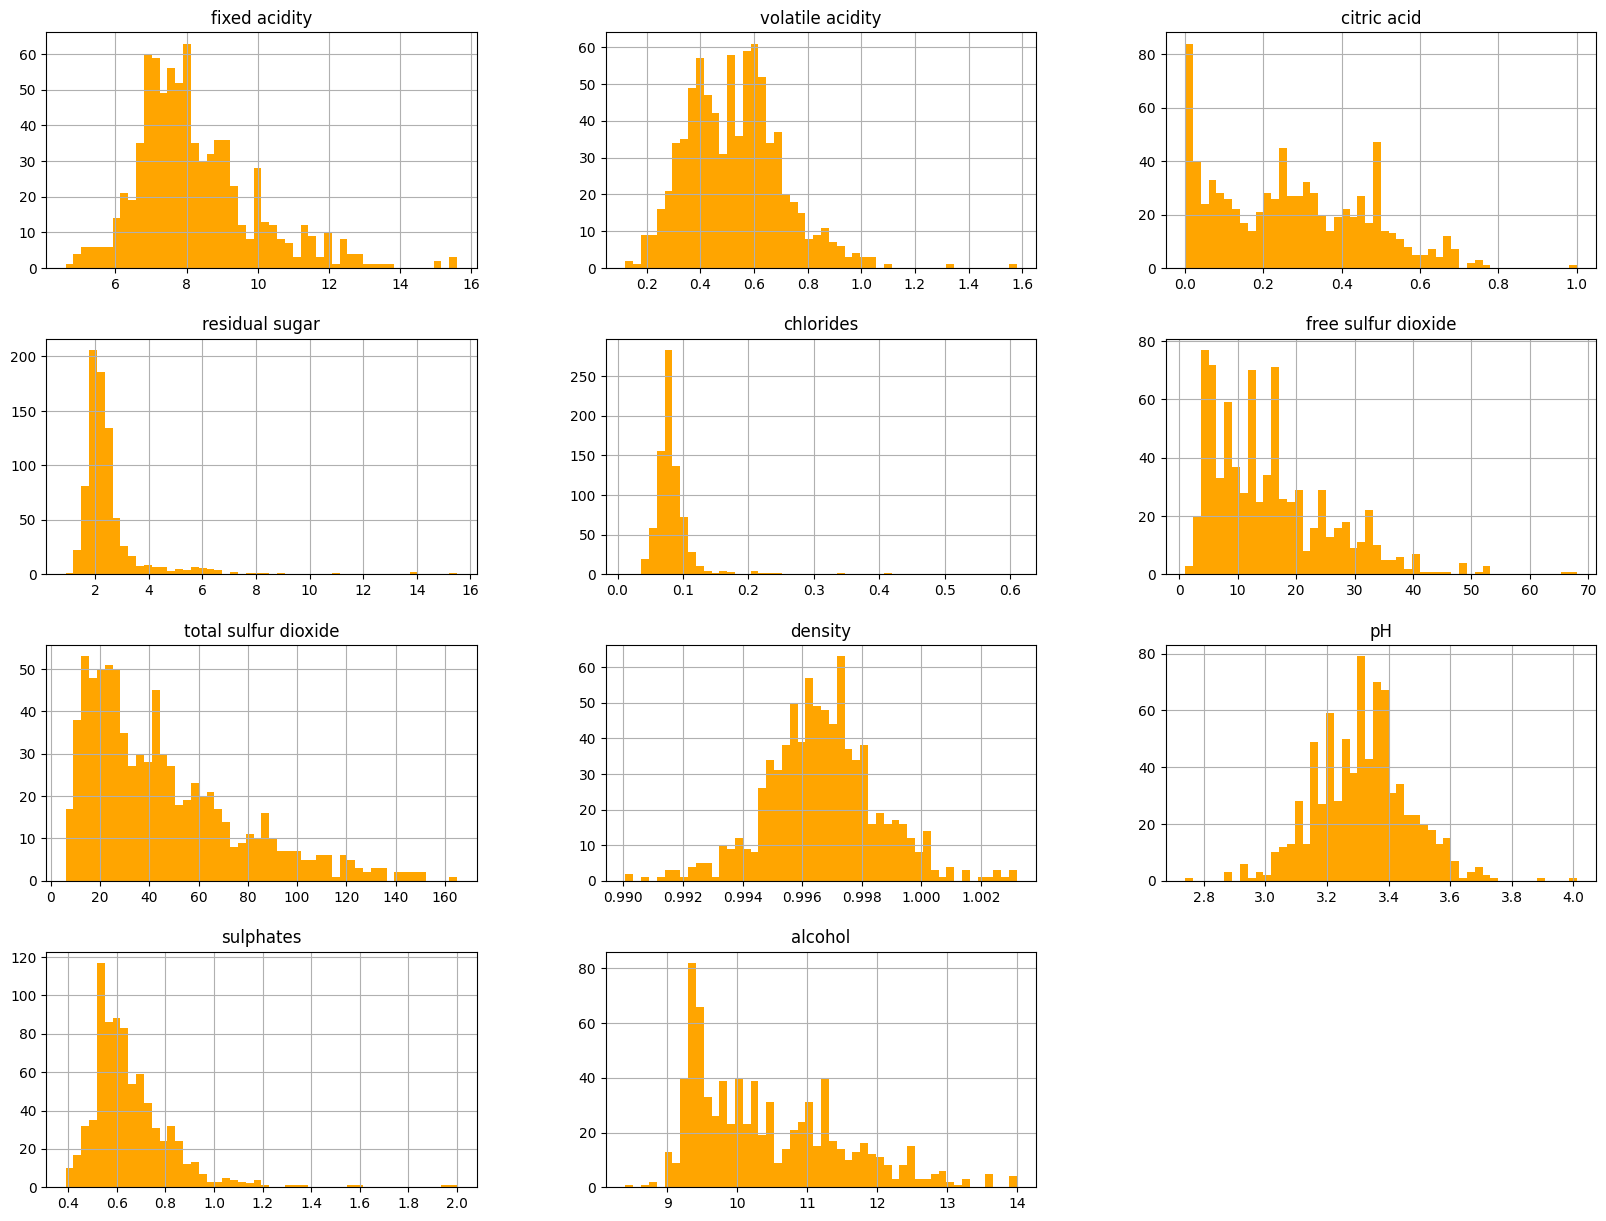

In [13]:
X_train.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [14]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,mean_absolute_error


In [15]:
lr=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
lr.fit(X_train, y_train)
y_predict=lr.predict(X_test)

In [16]:
# y_predict

In [17]:
def eval_matrix(actual,predict):
    rmse=np.sqrt(mean_squared_error(y_test,y_predict))
    mae=mean_squared_error(y_test,y_predict)
    r2=r2_score(y_test,y_predict)
    
    return rmse,mae,r2



In [18]:
(rmse,mae,r2)=eval_matrix(y_test,y_predict)

In [20]:
print(f"rmse:{rmse}")
print(f"mae:{mae}")
print(f"r2:{r2}")

rmse:0.647521285647496
mae:0.4192838153665861
r2:0.27886787915818545
